# LIF Ensemble

## Import dependencies

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sapinet.ensemble.spiking import LIFEnsemble
from sapinet.analysis.utils.plotting import spike_raster 
from sapinet.utils.heterogeneity import heterogenize

In [3]:
# Uncomment the following line if sapinet is not already installed in your current environment
# %pip install git+https://github.com/cplab/sapinet2.git

## Define experiment specific variables

In [4]:
steps = 200

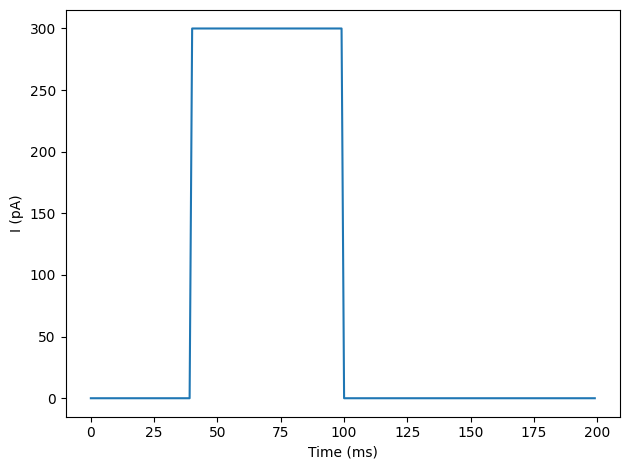

In [5]:
I = torch.ones(steps) * 300
I[int(steps/2):] = 0
I[:int(steps/5)] = 0

plt.subplots(1)
plt.plot(range(steps), I)
plt.xlabel('Time (ms)')
plt.ylabel('I (pA)')
plt.tight_layout()
plt.show()

## Let's create an ensemble of 10 neurons with heterogeneously initialized parameters

In [9]:
params = {
            "random" : 
                {
                'volt_rest': {
                                'method': 'uniform',
                                'args' : [-70.0, 20.0]
                            },
                'volt_thresh': {
                                'method': 'uniform',
                                'args' : [-55.0, 40.0]
                            },
                'leak_gl': {
                                'method': 'uniform',
                                'args' : [3.0, 7.0]
                            },
                'tau_mem': {
                                'method': 'uniform',
                                'args' : [3.0, 7.0]
                            },
                'tau_ref': {
                                'method': 'uniform',
                                'args' : [1.0, 3.0]
                            },
                }
}

spiking_ensemble = LIFEnsemble(10, params=params)

# heterogenize(obj=spiking_ensemble, settings=params, mode='zipped')

In [10]:
print(
        spiking_ensemble.volt_rest,
        spiking_ensemble.volt_thresh,
        spiking_ensemble.leak_gl,
        spiking_ensemble.tau_mem,
        spiking_ensemble.tau_ref,
        )

tensor([-65.1317, -59.6871, -55.8492, -59.5017, -51.6784, -61.8428, -63.9555,
        -62.7167, -57.1960, -53.7128]) tensor([-45.2635, -34.3742, -26.6985, -34.0035, -18.3568, -38.6856, -42.9109,
        -40.4334, -29.3921, -22.4256]) tensor([4.7039, 6.6095, 7.9528, 6.6744, 9.4126, 5.8550, 5.1156, 5.5491, 7.4814,
        8.7005]) tensor([4.7039, 6.6095, 7.9528, 6.6744, 9.4126, 5.8550, 5.1156, 5.5491, 7.4814,
        8.7005]) tensor([1.7302, 2.5469, 3.1226, 2.5747, 3.7482, 2.2236, 1.9067, 2.0925, 2.9206,
        3.4431])


In [11]:
output = [spiking_ensemble.forward(I[i]) for i in range(steps)]
print(output[0])

{'volt_mem': tensor([-72.9021, -72.6832, -72.5919, -72.6779, -72.5223, -72.7528, -72.8410,
        -72.7865, -72.6202, -72.5533]), 'spiked': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32), 'input': tensor([0.])}


## Plotting membrane voltage

In [12]:
volt_mem = [output[i].get('volt_mem') for i in range(steps)]
volt_mem = torch.stack(volt_mem)
volt_mem.shape

torch.Size([200, 10])

In [13]:
### Let's turn our Tutorial 1 plot of the voltage membrane into its own function for ease of use
def plot_voltage(voltage_data, simulation_steps):
    plt.subplots()
    plt.plot(range(simulation_steps), voltage_data)
    plt.xlabel('Time (ms)')
    plt.ylabel('V (mV)')
    plt.tight_layout()
    plt.show()


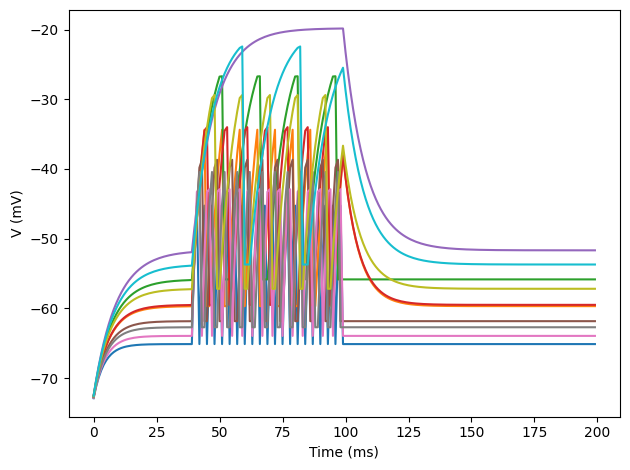

In [14]:
plot_voltage(volt_mem, steps)

In [15]:
spikes = [output[i].get('spiked') for i in range(steps)]
spikes = torch.stack(spikes)
spikes.shape

torch.Size([200, 10])

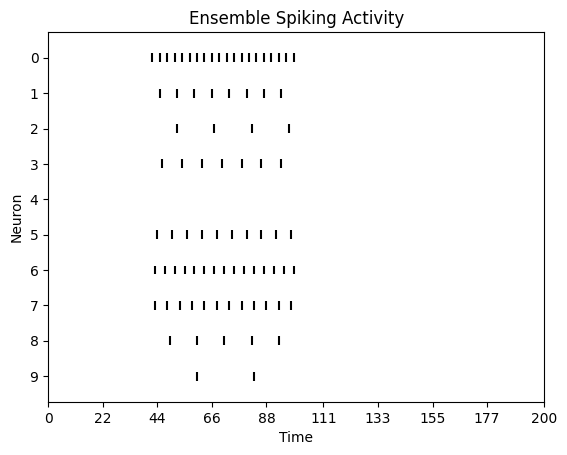

In [16]:
spike_raster(spikes)